### Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
trc=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_CATEGORICAL_METADATA.xlsx')  
trq=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_QUANTITATIVE_METADATA.xlsx')    
trf=pd.read_csv(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
trs=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAINING_SOLUTIONS.xlsx')  
tsc=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Test\TEST_CATEGORICAL.xlsx')
tsq=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TEST_QUANTITATIVE_METADATA.xlsx')    
tsf=pd.read_csv(r'C:\Users\Family\Desktop\WIDS-Com\Test\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')    
sub=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Submission\SAMPLE_SUBMISSION.xlsx')    
dic=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Submission\Data Dictionary.xlsx')


### COULOMNS

EHQ_EHQ_Total - Measures hand preference (right/left-handedness).

ColorVision_CV_Score - Score from a color vision test.

APQ_P_APQ_P_CP - Measures use of physical punishment by parents.

APQ_P_APQ_P_ID - Measures inconsistency in parental discipline.

APQ_P_APQ_P_INV - Measures parental involvement in the child’s life.

APQ_P_APQ_P_OPD - Measures other discipline methods used by parents.

APQ_P_APQ_P_PM - Measures how well parents monitor their child.

APQ_P_APQ_P_PP - Measures positive parenting (praise/rewards).

SDQ_SDQ_Conduct_Problems - Measures behavior issues like aggression.

SDQ_SDQ_Difficulties_Total - Total score of emotional, conduct, hyperactivity, and peer problems.

SDQ_SDQ_Emotional_Problems - Measures emotional struggles (e.g., anxiety, sadness).

SDQ_SDQ_Externalizing - Combines conduct problems and hyperactivity.

SDQ_SDQ_Generating_Impact - Measures how much difficulties affect daily life.

SDQ_SDQ_Hyperactivity - Measures hyperactivity/attention problems (e.g., ADHD symptoms).

SDQ_SDQ_Internalizing - Combines emotional and peer problems.

SDQ_SDQ_Peer_Problems - Measures struggles with friendships.

SDQ_SDQ_Prosocial - Measures kindness/helpfulness toward others.

MRI_Track,Age_at_Scan - Age during MRI scan.

Basic_Demos_Enroll_Year - Year participant joined the study.

Basic_Demos_Study_Site - Location where testing occurred.

PreInt_Demos_Fam_Child_Ethnicity - Child’s ethnicity.

PreInt_Demos_Fam_Child_Race - Child’s race.

MRI_Track_Scan_Location - Location of MRI scan.

Barratt_Barratt_P1_Edu - Parent 1’s education level.

Barratt_Barratt_P1_Occ - Parent 1’s occupation.

Barratt_Barratt_P2_Edu - Parent 2’s education level.

Barratt_Barratt_P2_Occ - Parent 2’s occupation.



In [5]:
trc.head()  

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [6]:
trc.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [7]:
trf.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [8]:
trq.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [9]:
trc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [10]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [11]:
trq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [12]:
tsc.describe()  

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [13]:
tsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 46.2+ MB


In [14]:
tsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              304 non-null    object 
 1   EHQ_EHQ_Total               303 non-null    float64
 2   ColorVision_CV_Score        295 non-null    float64
 3   APQ_P_APQ_P_CP              289 non-null    float64
 4   APQ_P_APQ_P_ID              289 non-null    float64
 5   APQ_P_APQ_P_INV             289 non-null    float64
 6   APQ_P_APQ_P_OPD             289 non-null    float64
 7   APQ_P_APQ_P_PM              289 non-null    float64
 8   APQ_P_APQ_P_PP              289 non-null    float64
 9   SDQ_SDQ_Conduct_Problems    274 non-null    float64
 10  SDQ_SDQ_Difficulties_Total  274 non-null    float64
 11  SDQ_SDQ_Emotional_Problems  274 non-null    float64
 12  SDQ_SDQ_Externalizing       274 non-null    float64
 13  SDQ_SDQ_Generating_Impact   274 non

#### lets merge our data ><

In [6]:
cq = pd.merge(trc, trq, on='participant_id', how='left')
feat = pd.merge(cq, trf, on='participant_id', how='left')  
qc = pd.merge(tsc, tsq, on='participant_id', how='left')
train = pd.merge(feat, trs, on='participant_id', how='left') 
test = pd.merge(qc, tsf, on='participant_id', how='left')  


In [16]:
train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


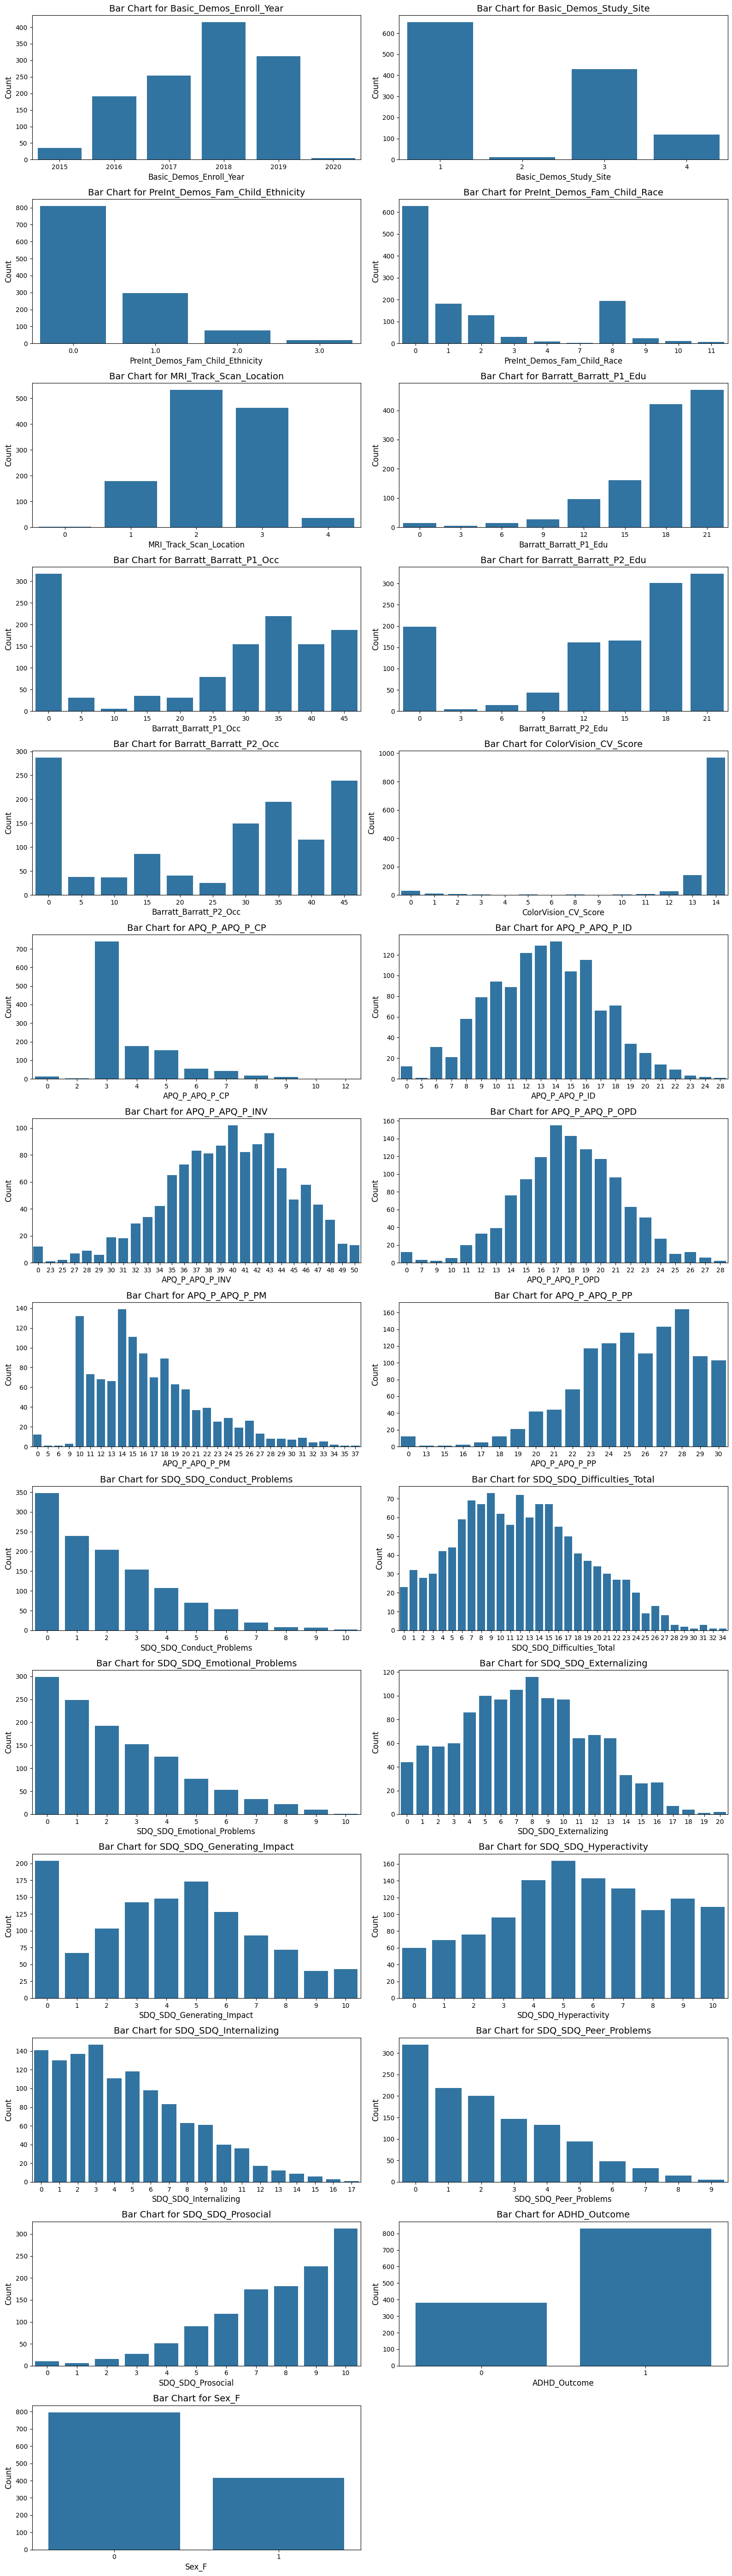

In [23]:

# Calculate the number of rows needed for the subplots
num_rows = (len(cq.columns) - 3 + 1) // 2  # Exclude 'participant_id', 'MIR_Track_Age_at_Scan', 'EHQ_EHQ_Total' and calculate rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Columns to exclude
exclude_columns = ['participant_id', 'MIR_Track_Age_at_Scan', 'EHQ_EHQ_Total']
cq = cq.append[(train['ADHD_outcome'],train['Sex_F'])]

# Loop through each column and plot the bar chart in the corresponding subplot
for i, column in enumerate(cq.columns):
    if column not in exclude_columns:
        sns.countplot(x=column, data=cq, ax=axes[i])
        axes[i].set_title(f'Bar Chart for {column}', fontsize=14)
        axes[i].set_xlabel(column, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

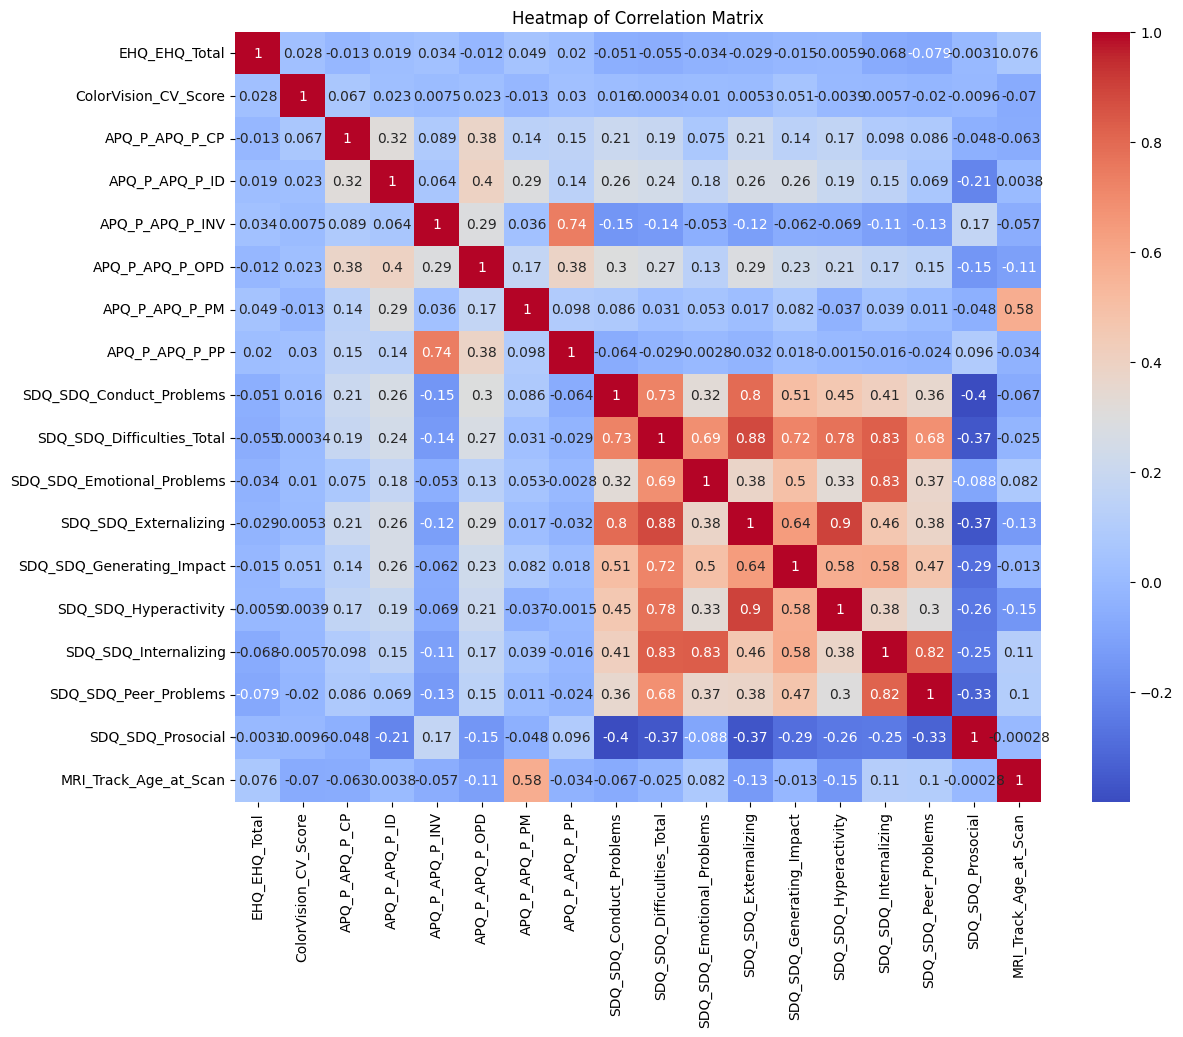

In [38]:
plt.figure(figsize=(13, 10))
sns.heatmap(trq.drop(columns=['participant_id']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

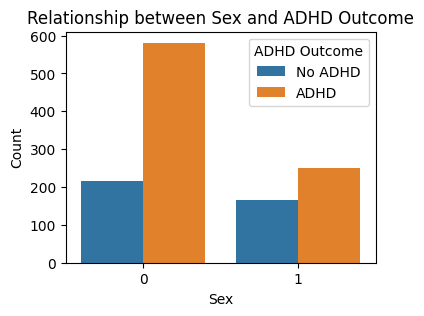

In [41]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Sex_F', hue='ADHD_Outcome', data=train)
plt.title('Relationship between Sex and ADHD Outcome')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='ADHD Outcome', loc='upper right', labels=['No ADHD', 'ADHD'])
plt.show()

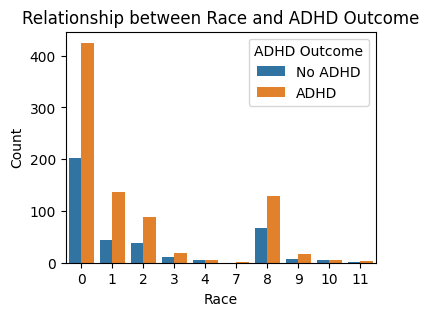

In [43]:
plt.figure(figsize=(4, 3))
sns.countplot(x='PreInt_Demos_Fam_Child_Race', hue='ADHD_Outcome', data=train)
plt.title('Relationship between Race and ADHD Outcome')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='ADHD Outcome', loc='upper right', labels=['No ADHD', 'ADHD'])
plt.show()

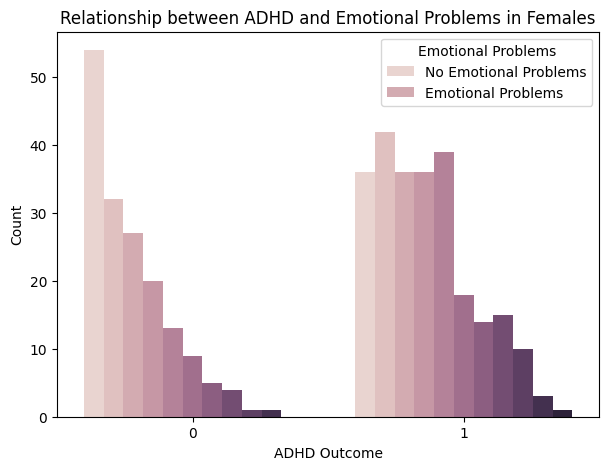

In [51]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Emotional_Problems', data=df_female)
plt.title('Relationship between ADHD and Emotional Problems in Females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='Emotional Problems', loc='upper right', labels=['No Emotional Problems', 'Emotional Problems'])
plt.show()

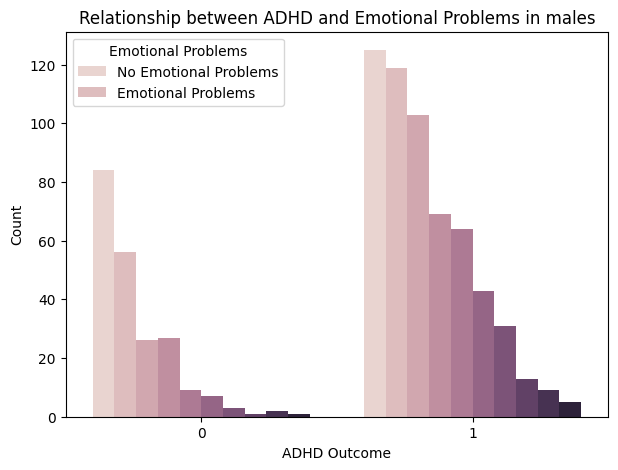

In [53]:
df_male = train [train['Sex_F'] == 0]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Emotional_Problems', data=df_male)
plt.title('Relationship between ADHD and Emotional Problems in males')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='Emotional Problems', loc='upper left', labels=['No Emotional Problems', 'Emotional Problems'])
plt.show()

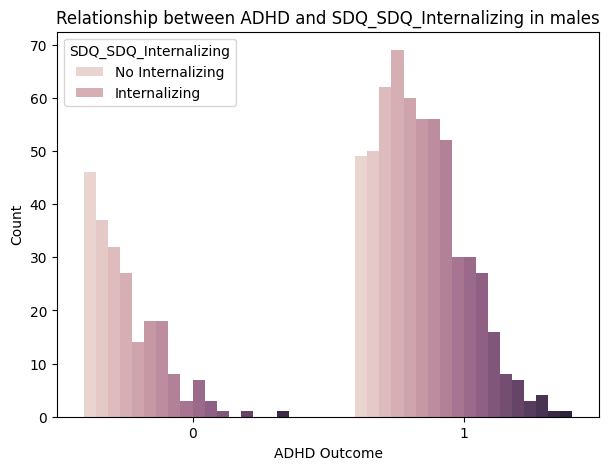

In [5]:
df_male = train [train['Sex_F'] == 0]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_male)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in males')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

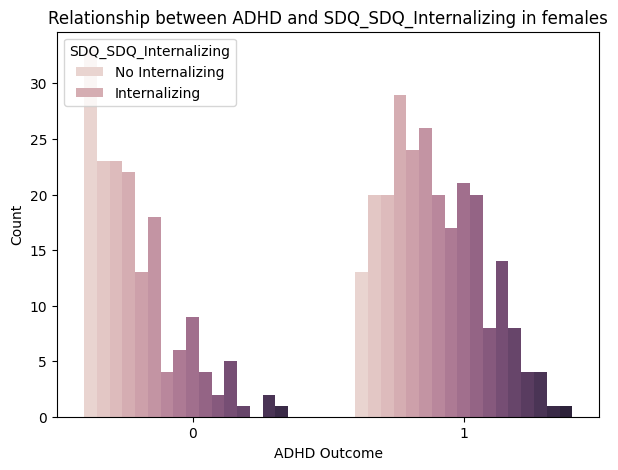

In [6]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_female)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

### Difference between Label Encoding and One-Hot Encoding

- **Label Encoding**: Assigns a unique integer to each category. Suitable for ordinal data where the order of categories is meaningful.
- **One-Hot Encoding**: Creates a binary column for each category. Suitable for nominal data where the order of categories is not meaningful.

In [11]:
cat_cols = cq.select_dtypes(include=['object']).columns
num_cols = cq.select_dtypes(include=['int64', 'float64']).columns
cat = qc.select_dtypes(include=['object']).columns
num = qc.select_dtypes(include=['int64', 'float64']).columns    

In [ ]:
processor = ColumnTransformer(transformers=
    [('num', StandardScaler(), num_cols , num),
     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols , cat)])     

X_train = processor.fit_transform(cq)
X_test = processor.transform(qc)

In [13]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)   

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1213 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB
